In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
city_day_data = pd.read_csv("./city_day.csv")
city_hour_data = pd.read_csv("./city_hour.csv")
station_day_data = pd.read_csv("./station_day.csv")
station_hour_data = pd.read_csv("./station_hour.csv")
station_data = pd.read_csv("./stations.csv")


C:\Users\div80\AppData\Local\Temp\ipykernel_17924\2477612335.py:4: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  station_hour_data = pd.read_csv("./station_hour.csv")


***Basic Knowledge about data***

1-->*The data contains pollution information about a city (city_hour or city_day dataframe ) and also particular station of a city represented by ( station_hour & station_day ) station id of that city*


2-->*The data contains information about a particular day ( city_day and station_day ) and also at some specific time stamp of a day ( city_hour and station_hour )*



***Let's First analyse data set of a particular city***

In [3]:
series = ['City' , 'Date' , 'PM2.5' , 'PM10' , 'NO' , 'NO2' , 'CO' , 'SO2' , 'O3' , 'AQI' , 'AQI_Bucket']

In [4]:
city_day_data_req = city_day_data[series].copy()

In [5]:
city_day_data_req.isna().sum().sum()
city_day_newdata_req = city_day_data_req.dropna()

**Handling the missing values**

In [6]:
# !pip install missingno

<Axes: >

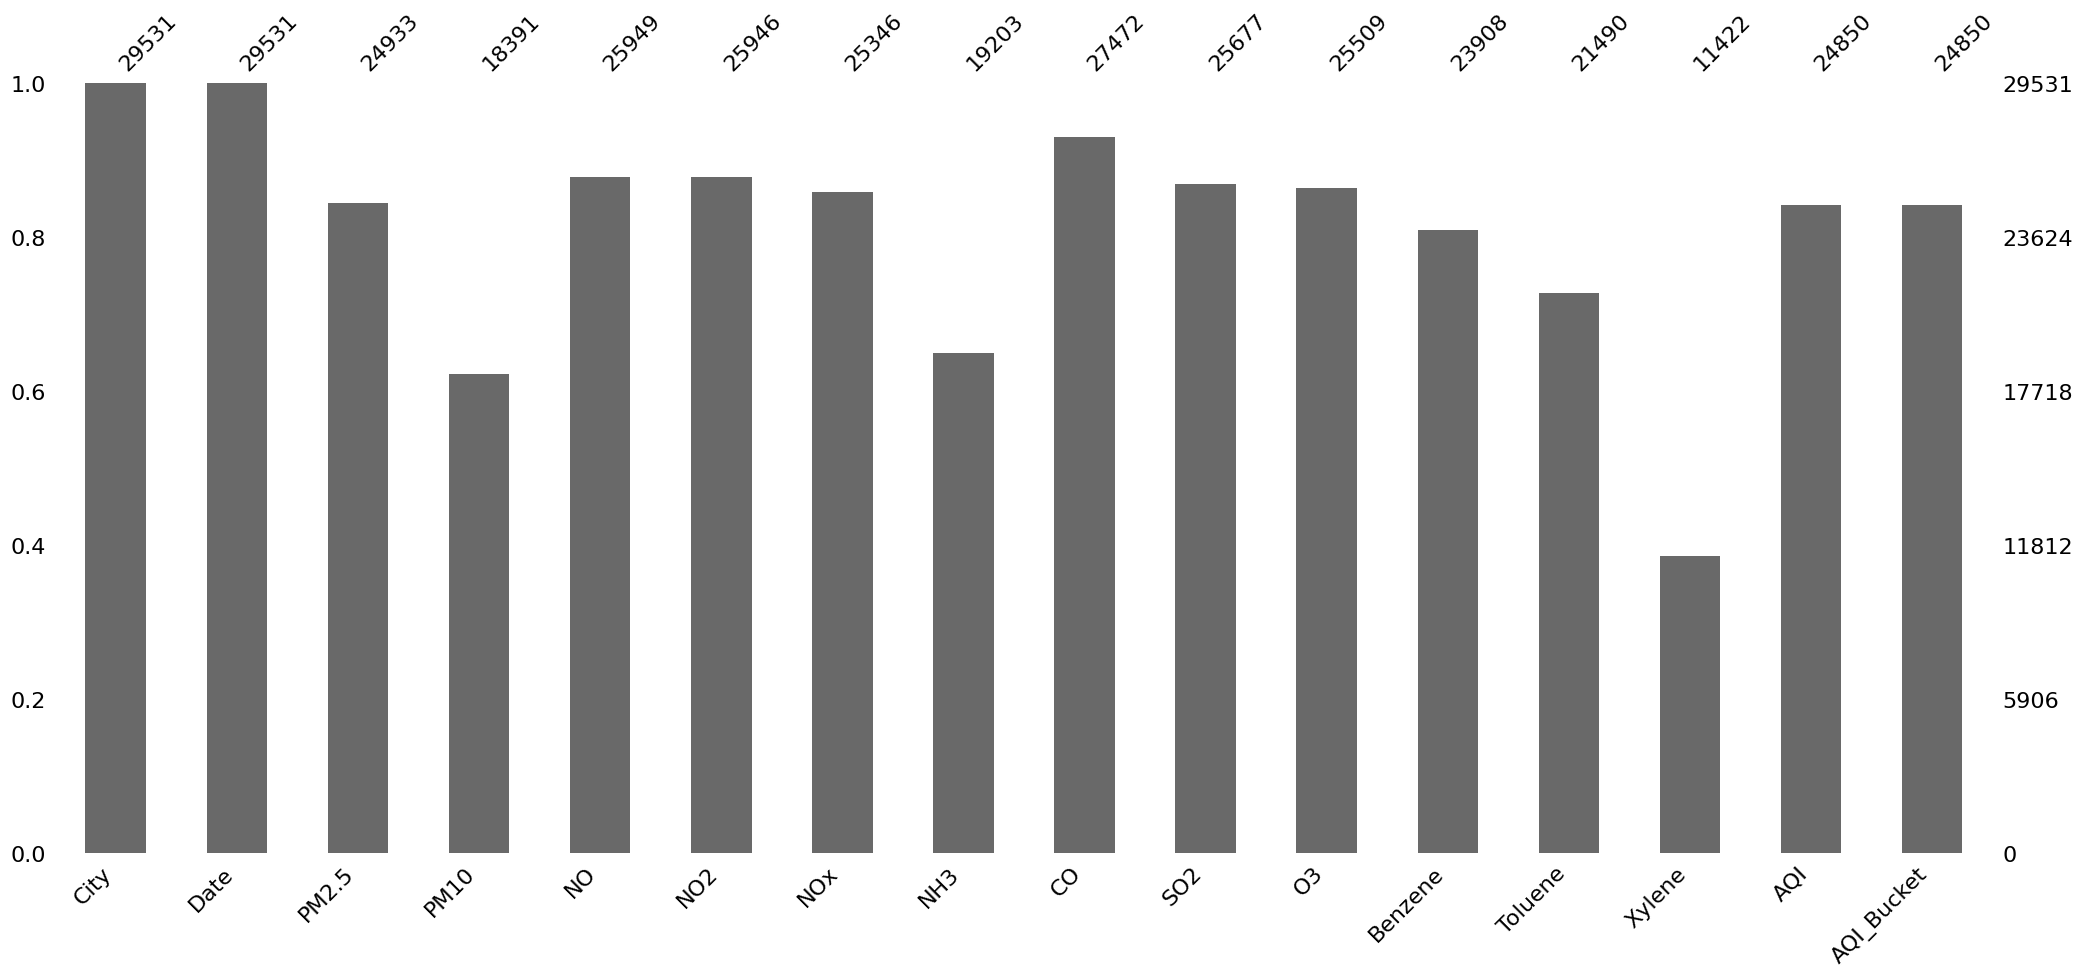

In [7]:
import missingno as msno
msno.bar(city_day_data)


<Axes: >

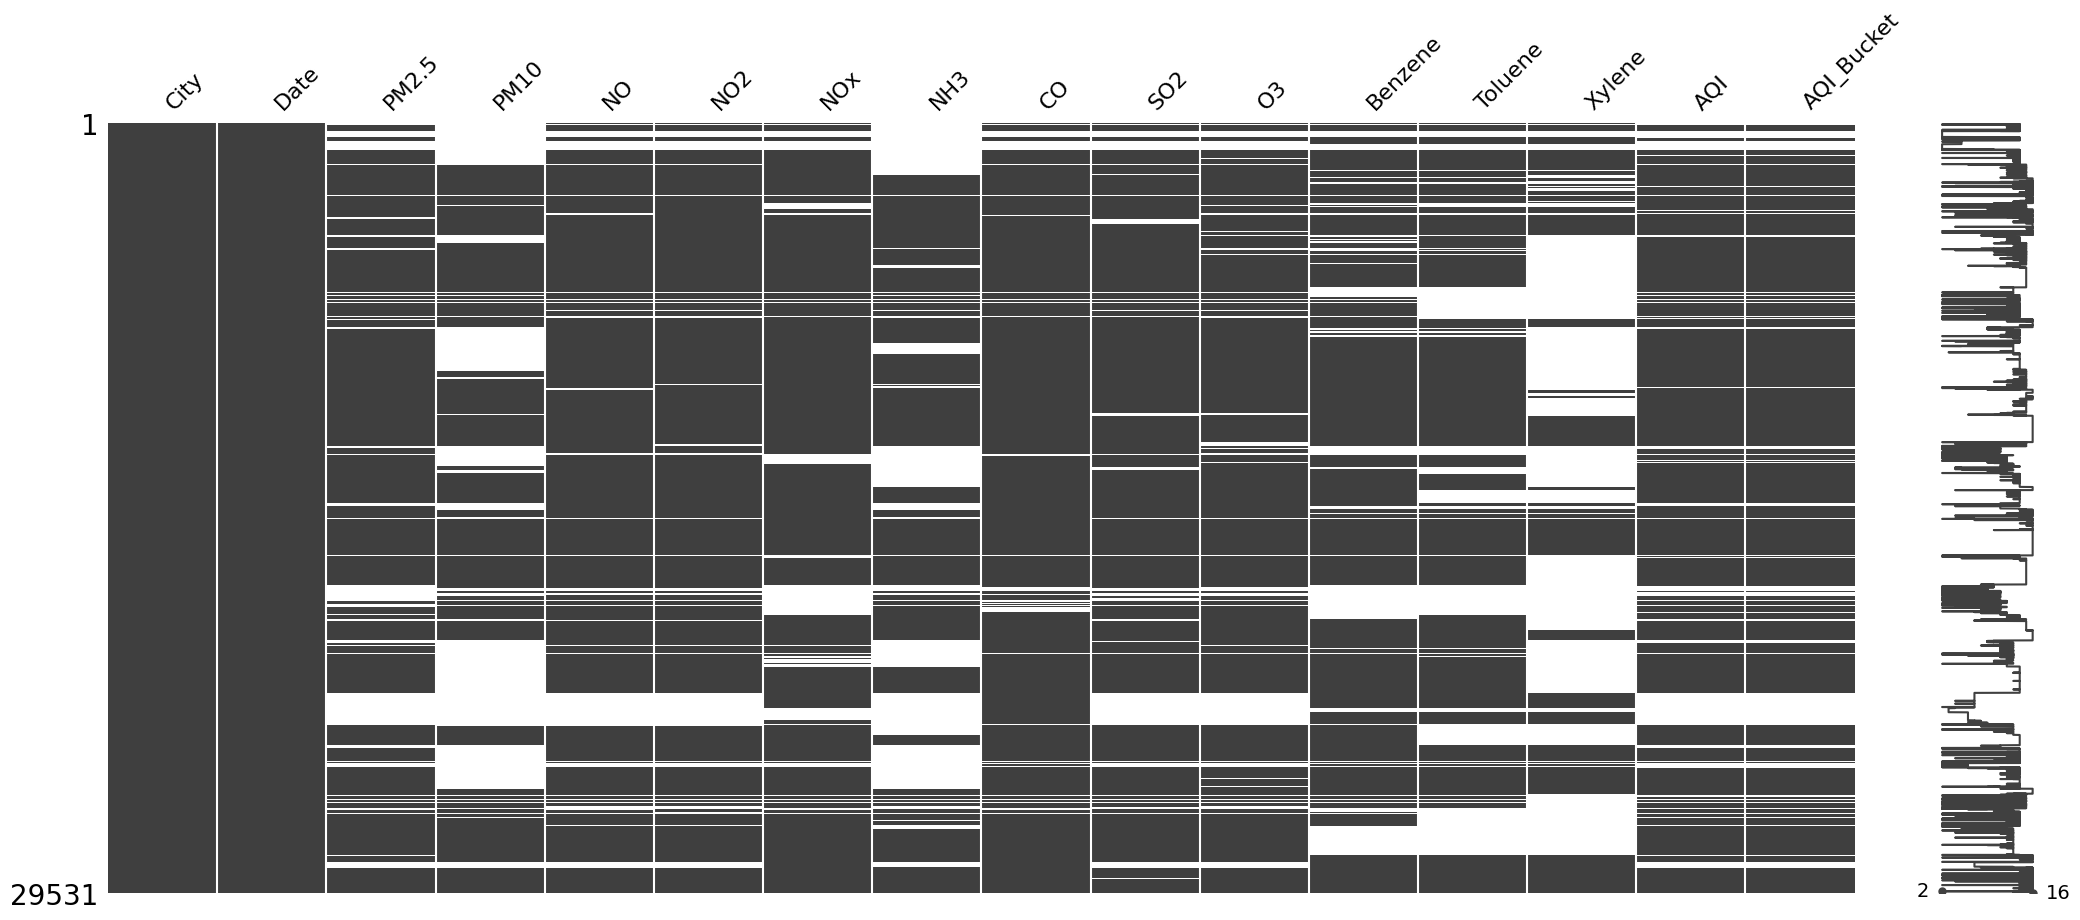

In [8]:
msno.matrix(city_day_data)

<Axes: >

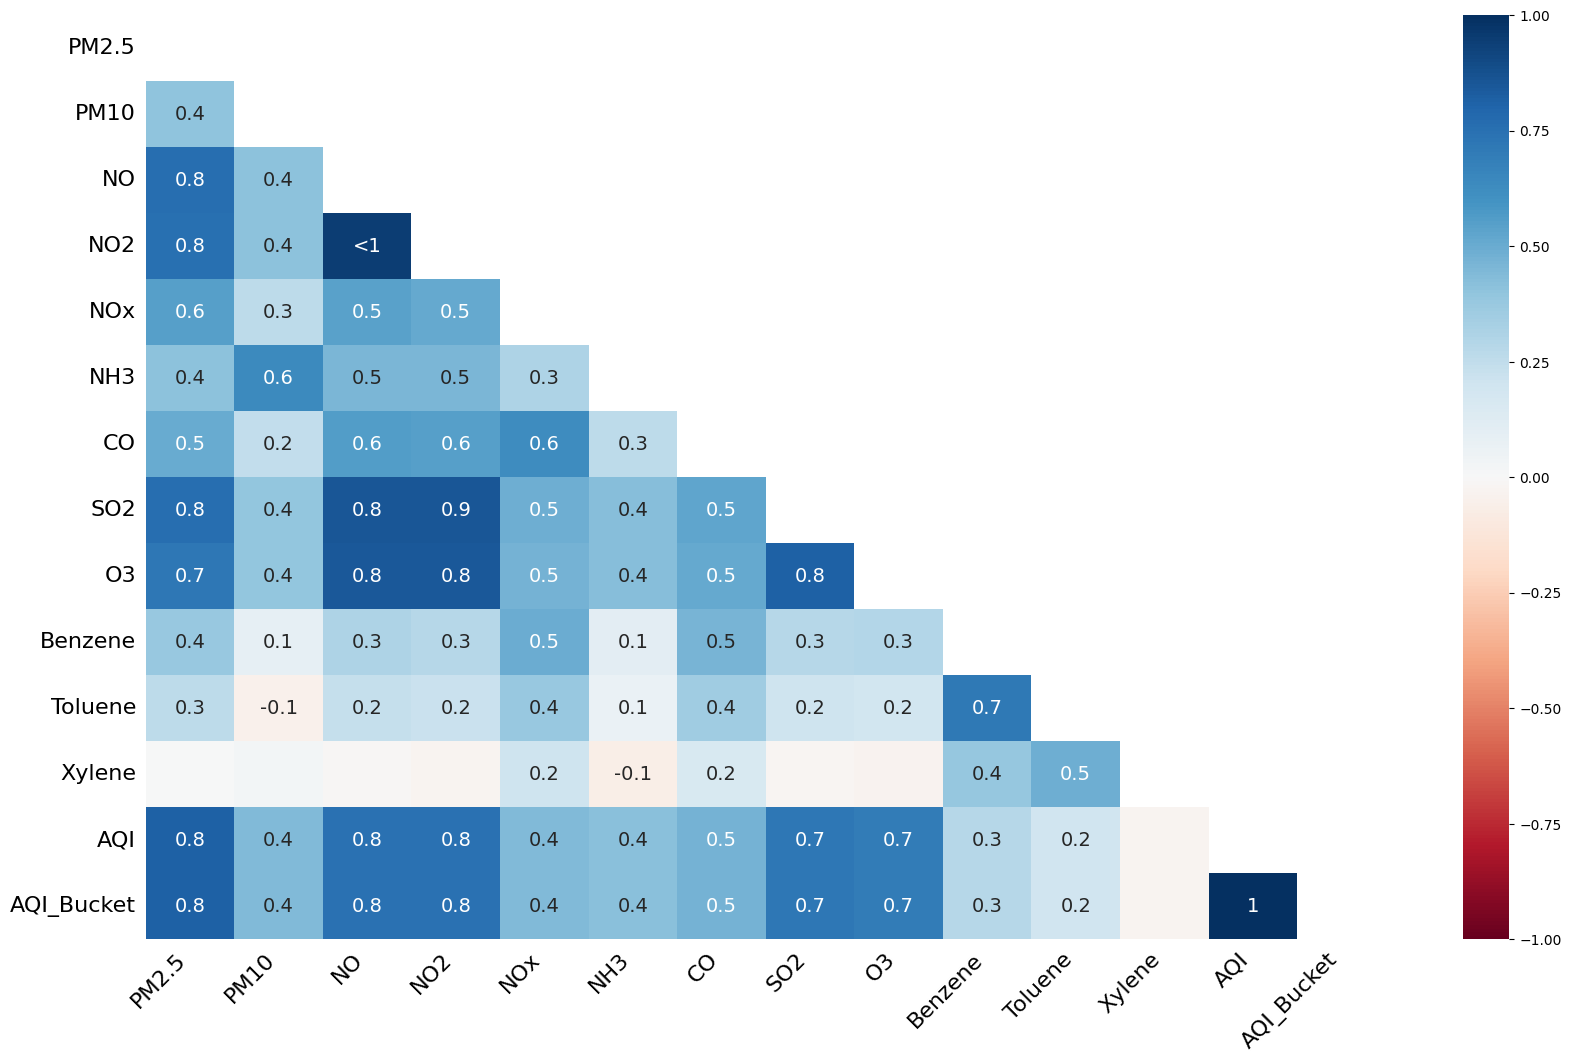

In [9]:
msno.heatmap(city_day_data)

The data is time series and also dependent on different city.
The data is missing in separate places and also all data is missing for some specific cities.
So its better to remove the rows containing the missing values

In [10]:
city_hour_new_data = city_hour_data.dropna()
city_hour_new_data
city_day_new_data = city_day_data.dropna()
city_day_new_data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2123,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2124,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
2125,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
2126,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
2127,Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,Visakhapatnam,2020-06-26,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0,Good
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory


In [11]:
grouped_df = city_day_data.groupby(['City'])
grouped_df.last()
new_df = grouped_df.last()
new_df
new_f_df = grouped_df.first()

In [12]:
import plotly.express as px

e:\project files in vs code\gfg ecothon\Final project data analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\project files in vs code\gfg ecothon\Final project data analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\project files in vs code\gfg ecothon\Final project data analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='City', ylabel='PM2.5'>

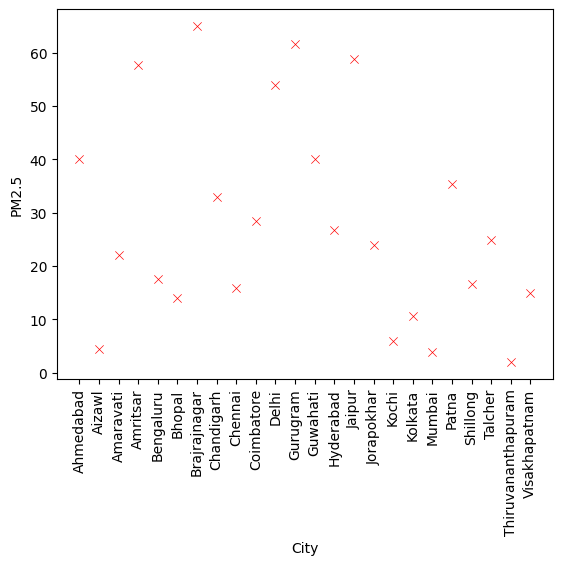

In [52]:
plt.xticks(fontsize=10, rotation=90)
sns.scatterplot(x = 'City',y = 'PM2.5' ,data = new_df , color = 'red' , marker= 'x')


e:\project files in vs code\gfg ecothon\Final project data analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\project files in vs code\gfg ecothon\Final project data analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

e:\project files in vs code\gfg ecothon\Final project data analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='City', ylabel='PM10'>

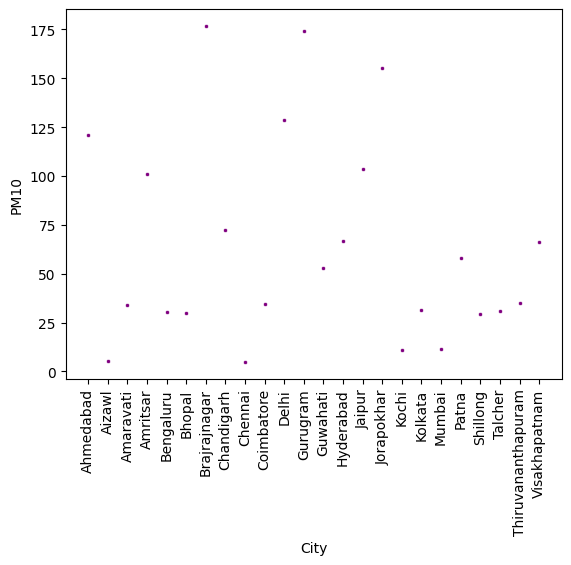

In [53]:
fig = plt.xticks(fontsize=10, rotation=90)
sns.scatterplot(x = 'City',y = 'PM10' ,data = new_df , color = 'purple' , marker= '.')

In [15]:

import geopandas as gpd


In [16]:
fp = r'./Maps_with_python-master/india-polygon.shp'
map_df = gpd.read_file(fp) 
map_df_copy = gpd.read_file(fp)
map_df.head()

,id,st_nm,geometry
0,NaN,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,NaN,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,NaN,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,NaN,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,NaN,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


In [37]:
city_day_newdata_req
station_data
merged_city_state = pd.merge(city_day_newdata_req,station_data,on='City',how = 'inner')
merged_city_state
grouped_df = merged_city_state.groupby(['City'])
new_df = grouped_df.last()
new_df
ser3 = ['PM2.5' , 'State']
req_df = new_df[ser3].copy()
req_df = req_df.sort_values('State')
req_df

,PM2.5,State
City,,
Visakhapatnam,15.00,Andhra Pradesh
Amaravati,22.00,Andhra Pradesh
Guwahati,40.00,Assam
Patna,35.42,Bihar
Chandigarh,32.90,Chandigarh
Delhi,54.01,Delhi
Ahmedabad,40.02,Gujarat
Gurugram,61.64,Haryana
Jorapokhar,23.90,Jharkhand


In [58]:
station_data

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active
...,...,...,...,...,...
225,WB010,"Jadavpur, Kolkata - WBPCB",Kolkata,West Bengal,Active
226,WB011,"Rabindra Bharati University, Kolkata - WBPCB",Kolkata,West Bengal,Active
227,WB012,"Rabindra Sarobar, Kolkata - WBPCB",Kolkata,West Bengal,Active
228,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active


In [70]:
station_day_data


,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108030,WB013,2020-06-27,8.65,16.46,NaN,NaN,NaN,NaN,0.69,4.36,30.59,1.32,7.26,NaN,50.0,Good
108031,WB013,2020-06-28,11.80,18.47,NaN,NaN,NaN,NaN,0.68,3.49,38.95,1.42,7.92,NaN,65.0,Satisfactory
108032,WB013,2020-06-29,18.60,32.26,13.65,200.87,214.20,11.40,0.78,5.12,38.17,3.52,8.64,NaN,63.0,Satisfactory
108033,WB013,2020-06-30,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,29.64,1.86,8.40,NaN,57.0,Satisfactory


In [79]:
name_id = pd.merge(station_day_data,station_data,on='StationId',how = 'inner')
name_id
lst = ['StationName', 'StationId']
station_name_id = pd.DataFrame(name_id[lst])
station_name_id.drop_duplicates(inplace=True)
station_name_id

,StationName,StationId
0,"Secretariat, Amaravati - APPCB",AP001
951,"GVM Corporation, Visakhapatnam - APPCB",AP005
2413,"Railway Colony, Guwahati - APCB",AS001
2915,"DRM Office Danapur, Patna - BSPCB",BR005
3041,"Govt. High School Shikarpur, Patna - BSPCB",BR006
...,...,...
105493,"Fort William, Kolkata - WBPCB",WB009
105891,"Jadavpur, Kolkata - WBPCB",WB010
106286,"Rabindra Bharati University, Kolkata - WBPCB",WB011
106890,"Rabindra Sarobar, Kolkata - WBPCB",WB012


In [82]:
station_name_id[station_name_id['StationName']=='Victoria, Kolkata - WBPCB']['StationId']

107221    WB013
Name: StationId, dtype: object

In [60]:
para=['StationName', 'StationId']

station_id_name = station_data[para].copy()

station_id_name


,StationName,StationId
0,"Secretariat, Amaravati - APPCB",AP001
1,"Anand Kala Kshetram, Rajamahendravaram - APPCB",AP002
2,"Tirumala, Tirupati - APPCB",AP003
3,"PWD Grounds, Vijayawada - APPCB",AP004
4,"GVM Corporation, Visakhapatnam - APPCB",AP005
...,...,...
225,"Jadavpur, Kolkata - WBPCB",WB010
226,"Rabindra Bharati University, Kolkata - WBPCB",WB011
227,"Rabindra Sarobar, Kolkata - WBPCB",WB012
228,"Victoria, Kolkata - WBPCB",WB013


In [68]:
st = 'Tirumala, Tirupati - APPCB'
station_id_name[station_id_name['StationName'] == st]['StationId']

2    AP003
Name: StationId, dtype: object

In [18]:
ans_df = req_df.drop_duplicates(subset = ['State'], keep = 'last')
ans_df 

,PM2.5,State
City,,
Amaravati,22.00,Andhra Pradesh
Guwahati,40.00,Assam
Patna,35.42,Bihar
Chandigarh,32.90,Chandigarh
Delhi,54.01,Delhi
Ahmedabad,40.02,Gujarat
Gurugram,61.64,Haryana
Jorapokhar,23.90,Jharkhand
Bengaluru,17.50,Karnataka


In [19]:
merged = map_df.set_index('st_nm').join(ans_df.set_index('State'))
merged['PM2.5'] = merged['PM2.5'].replace(np.nan, 0)
merged.head()

,id,geometry,PM2.5
st_nm,,,
Andaman and Nicobar Islands,NaN,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",0.00
Arunachal Pradesh,NaN,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",0.00
Assam,NaN,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",40.00
Bihar,NaN,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",35.42
Chandigarh,NaN,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",32.90


e:\project files in vs code\gfg ecothon\Final project data analysis\env\lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: title={'center': 'State-wise Air Quality(PM2.5)'}>

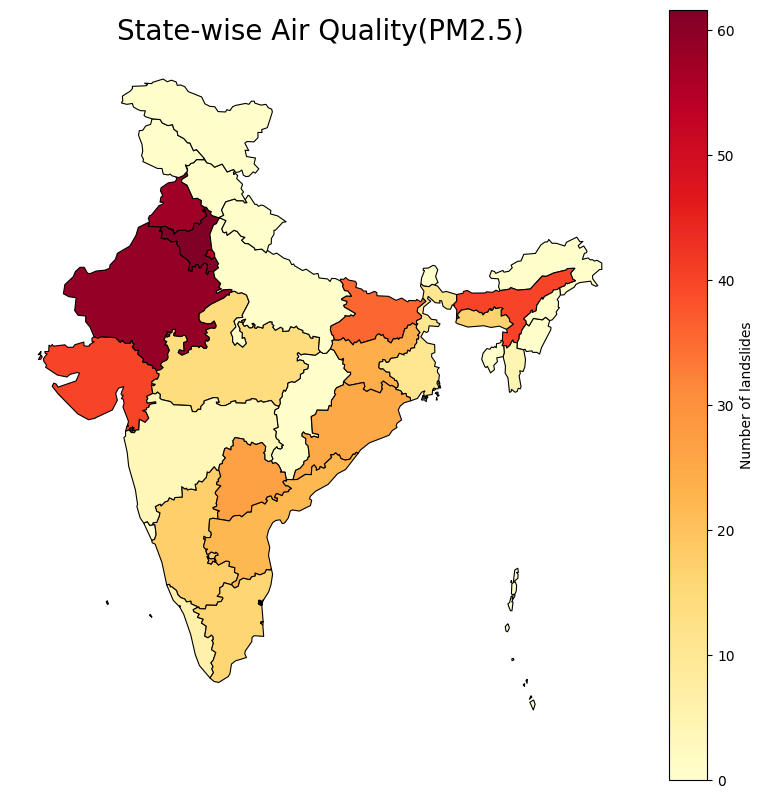

In [20]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Air Quality(PM2.5)', fontdict={'fontsize': '20', 'fontweight' : '10'})
# Plot the figure
merged.plot(column='PM2.5',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of landslides"})

In [21]:
good = new_f_df[new_f_df['AQI_Bucket'].str.contains("Good")]
gd = good.count()
Satisfactory = new_f_df[new_f_df['AQI_Bucket'].str.contains("Satisfactory")]
Moderate = new_f_df[new_f_df['AQI_Bucket'].str.contains("Moderate")]
Poor = new_f_df[new_f_df['AQI_Bucket'].str.startswith("Poor")]
Very_poor = new_f_df[new_f_df['AQI_Bucket'].str.contains("Very Poor")]
Severe = new_f_df[new_f_df['AQI_Bucket'].str.contains("Severe")]
sd = Satisfactory.count()
md = Moderate.count()
poord = Poor.count()
vpd = Very_poor.count()
sed = Severe.count()
list1 = ["Good" , "Satisfactory" , "Very Poor" , "Severe" , "Poor", "Moderate"]
list2 = [gd.Date , sd.Date , vpd.Date , sed.Date , poord.Date , md.Date]

In [57]:
good.reset_index(inplace=True)
good['City']

0              Shillong
1    Thiruvananthapuram
Name: City, dtype: object

In [54]:
df5 = pd.DataFrame(list(zip(list1,list2)),columns=["AQI_Bucket" , "Number of cities"])
df5

,AQI_Bucket,Number of cities
0,Good,2
1,Satisfactory,10
2,Very Poor,3
3,Severe,2
4,Poor,2
5,Moderate,7


In [23]:
fig = px.pie(df5, values='Number of cities', names='AQI_Bucket', title='Air Quality Condition' , hole=0.7)
fig.add_annotation(dict(x=0.5, y=0.3,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="Category"))
fig.add_layout_image(
    dict(
        source="https://png.pngtree.com/element_our/20200702/ourlarge/pngtree-environmental-protection-industry-pollution-building-elements-image_2288148.jpg",
        xref="paper", yref="paper",
        x=0.5, y=0.34,
        sizex=0.4, sizey=0.4,
        xanchor="center", yanchor="bottom", sizing= "contain",
    )
)

In [24]:
#Make a graph where user enters the input and then we show the graph related to that input
city = "Visakhapatnam"

In [25]:
ser = ["City" , "Date" ,  "PM2.5"  , "PM10"]

In [26]:
city_day_data_PM = city_day_data[ser].copy()
city_day_data_PM
city_day_data_PM.dropna(inplace = True)
city_specific_data = city_day_data_PM[city_day_data_PM['City'] == city]

In [34]:
fig = px.line(city_specific_data, x="Date", y="PM2.5", title='Air quality vs Time')
fig.show()

In [35]:
fig = px.line(city_specific_data, x="Date", y="PM10", title='Air quality of city with Time')
fig.show()

In [ ]:
st = 'Tirumala, Tirupati - APPCB'
station_id_name[station_id_name['StationName'] == st]['StationId']

In [29]:
stationid = "AP001"

In [31]:
ser2 = ["StationId" , "Date" ,  "PM2.5"  , "PM10"]

In [32]:
station_day_data_PM = station_day_data[ser2].copy()
station_day_data_PM.dropna(inplace = True)
station_specific_data = station_day_data_PM[station_day_data_PM['StationId'] == stationid]

In [33]:
fig = px.line(station_specific_data, x="Date", y="PM10", title='Air quality of stations with Time')
fig.show()